# Lab 9 - Dummy variables and Scikit Learn

We will continued learning about linear regression by predicting health insurance prices, using the same dataset from Lab 7.

Data URL: [https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv](https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv)

In this data, each row represents an insurance policy and the 7 columns contain the following information about it:
- age: age of policy holder
- sex: sex of policy holder
- bmi: boday mass index (bmi) of policy holder.  bmi is a (sometimes unreliable) measurement of body fat in adults
- children: number of children (dependents) on the policy
- smoker: whether the policy holder is a smoker
- region: region of the country the policy holder lives in
- charges: price for insurance policy

### Section 1: Loading the data and exploratory data analysis

Run the import statements to load the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline

Load the CSV file into a dataframe and display it:

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In Lab 7, we performed a lot of exploratory data analysis on this data set.  Let's recall how being a smoker affected the insurance policy charges.  Use Seaborn to make a scatter plot with age on the x axis and charges on the y axis, colored by whether the person is a smoker.

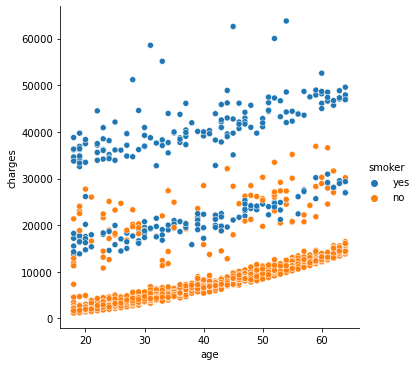

In [3]:
sns.relplot(x = "age", y= "charges", hue = "smoker", data = insurance)

Based on this graph, how does being a smoker affect insurance policy charges?

The `smoker` variable is qualitative or categorical, so we could not inclue it in our linear model in Lab 7.  To see the effect of omitting it, use Seaborn to plot a scatter plot of age (x axis) vs. charges (y axis) with the regression line for this relationship.

Recall you can do this with the function `regplot()`.

<AxesSubplot:xlabel='age', ylabel='charges'>

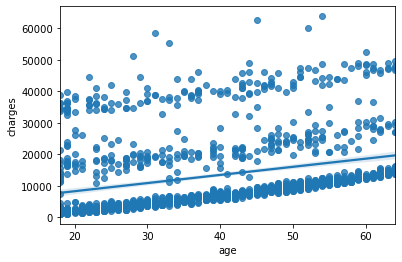

In [4]:
sns.regplot(x = "age", y = "charges", data = insurance)

How useful is this linear model?

### Section 2: Dummy variables

We have seen that whether someone smokes is important information for predicting their health insurance policy cost.  So we need a way to include qualitative or categorical data as independent variables in linear regression.  We do this by creating quantitative *dummy variables* from the categorical variables.

The code below creates a new DataFrame called `insurance_new` with the `smoker` column replaced by a dummy variable for it.

In [6]:
insurance_new = pd.get_dummies(insurance, columns = ["smoker"], drop_first = True)
insurance_new

age     sex     bmi  children     region      charges  smoker_yes
0      19  female  27.900         0  southwest  16884.92400           1
1      18    male  33.770         1  southeast   1725.55230           0
2      28    male  33.000         3  southeast   4449.46200           0
3      33    male  22.705         0  northwest  21984.47061           0
4      32    male  28.880         0  northwest   3866.85520           0
...   ...     ...     ...       ...        ...          ...         ...
1333   50    male  30.970         3  northwest  10600.54830           0
1334   18  female  31.920         0  northeast   2205.98080           0
1335   18  female  36.850         0  southeast   1629.83350           0
1336   21  female  25.800         0  southwest   2007.94500           0
1337   61  female  29.070         0  northwest  29141.36030           1

[1338 rows x 7 columns]

What is the name of the new dummy variable?  What values are stored in this column?  What does a 1 correspond to?  A 0?

In this case, the new dummy variable is called `smoker_yes`, which indicates that a `yes` in the original `smoker` column will be replaced by a 1 in the new `smoker_yes` column.  A `no` in the `smoker` column is replaced by a 0 in the `smoker_no` column.  Thus, we have converted categorical data (with categories `yes` and `no`) into quantitative data (with values 0 or 1).

Make a new linear regression model with independent variables `age` and `smoker_yes` and dependent variable `charges`. 

In [7]:
lm2 = smf.ols("charges ~ age + smoker_yes", data = insurance_new).fit()

If you haven't already, display the summary of your linear model.

In [8]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:14:09   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2391.6264    528.302     -4.527      0.000   -3428.019   -1355.234
age          274.8712     12.455     22.069      0.000     250.437     299.305
smoker_yes  2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What is R-squared for this model?  How does it compare to the R-squared we computed in Lab 7 for independent variables `age`, `bmi`, `children`?  Which model do you think is better?

Plot the histogram of the residuals for your new model.

<AxesSubplot:>

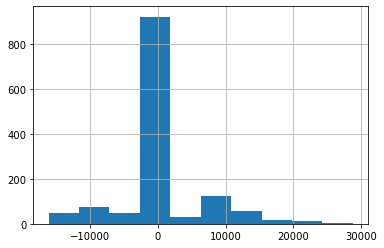

In [9]:
lm2.resid.hist()

Are these residuals approximately normally distributed and centered at 0?  How do they compare to the residuals of the Lab 7 linear model (with independent variables `age`, `bmi`, `children`)?

Finally, make a scatterplot of the actual charges on the x axis and the residuals on the y axis.

Text(0, 0.5, 'Residual')

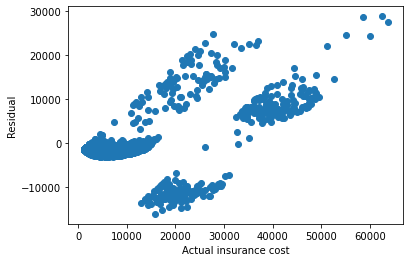

In [11]:
plt.scatter(x = insurance_new["charges"], y = lm2.resid)
plt.xlabel("Actual insurance cost")
plt.ylabel("Residual")

What do you notice about this plot?  How does it compare to the one we made in Lab 7?

Based on both R-squared and the residual plots, which linear model do you think is better - the one with independent variables `age` and `smoker_yes` or the one with independent variables `age`, `bmi`, `children` from Lab 7?

### Section 3:  How dummy variables work 

What is the equation of the linear model found in Section 2?  Let $X_1$ be the variable `age` and let $X_2$ be the variable `smoker_yes`.

<details><summary>Answer:</summary>
$$Y = -2391.6264 + 274.8712X_1 + 23860X_2$$
</details>

Imagine we are trying to predict the insurance policy cost for someone who smokes.  Then the variable $X_2$ will be 1.

Plug this into the equation of the linear model:
$$Y = -2391.6264 + 274.8712X_1 + 23860(1)$$
$$Y = -2391.6264 + 274.8712X_1 + 23860$$
$$Y = (-2391.6264 + 23860) + 274.8712X_1$$

We now have a linear equation with only one variable ($X_1$).  Let's plot the corresponding line on our scatterplot.

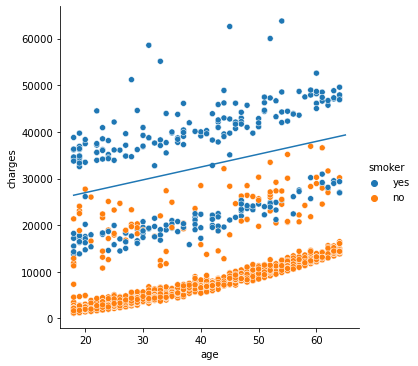

In [12]:
# Create an array (set) of 100 evenly spaced ages between 18 and 64.
xx = np.linspace(18, 65, 100)
# Find the predicted insurance policy cost for each of the ages in our array, 
# assuming the person is a smoker.
yy_smoker = (-2391.6264 + 23860) + 274.8712*xx

# Plot the Seaborn scatter plot of age (x) vs. charges (y) colored by smoker variable.
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)

# Add the line showing how insurance charges change with age for a smoker
# in our linear model.  
plt.plot(xx, yy_smoker)

Where is this line situated, relative to the rest of the scatter plot?  Does this make sense?

Now imagine we want to predict the insurance policy cost for a non-smoker.  Then the variable $X_2$ will be 0.   Plug $X_2 = 0$ into our original linear equation:
$$Y = -2391.6264 + 274.8712X_1 + 23860(0)$$
$$Y = -2391.6264 + 274.8712X_1 + 0$$
$$Y = -2391.6264 + 274.8712X_1$$

We again have the equation for a line.  Let's plot it on our scatterplot as well.

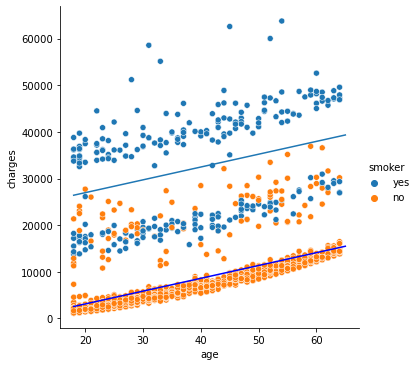

In [13]:
# Create an array (set) of 100 evenly spaced ages between 18 and 64.
xx = np.linspace(18, 65, 100)
# Find the predicted insurance policy cost for each of the ages in our array, 
# assuming the person is a smoker.
yy_smoker = (-2391.6264 + 23860) + 274.8712*xx
# Find the predicted insurance policy cost for each of the ages in our array, 
# assuming the person is NOT a smoker.
yy_non_smoker = -2391.6264 + 274.8712*xx

# Plot the Seaborn scatter plot of age (x) vs. charges (y) colored by smoker variable.
sns.relplot(x = "age", y = "charges", hue = "smoker", data = insurance)

# Add the line showing how insurance charges change with age for a smoker
# in our linear model.  
plt.plot(xx, yy_smoker)

# Add the line (also in blue) showing how insurance charges change with age for a smoker
# in our linear model.  
plt.plot(xx, yy_non_smoker, color = "blue")

Where is the non-smoker line?  Does this make sense?  

In conclusion, the `smoker_yes` dummy variable means the linear regression uses the top line to predict the insurance cost from age when the person is a smoker, and it uses the bottom line to predict the insurance cost from age when the person is not a smoker.

### Section 4: Using all the variables

Let's add the remaining quantitative and qualitative variables as independent variables in our linear regression model.

First, change the other two qualitative variables into dummy variables.  Use the same code as we used to change `smoker`, but 

1) change the `columns` parameter to `columns = ["sex","region"]` and 

2) change the DataFrame to change to `insurance_new`.

In [14]:
insurance_new2 = pd.get_dummies(insurance_new, columns = ["sex","region"], drop_first = True)
insurance_new2

age     bmi  children      charges  smoker_yes  sex_male  \
0      19  27.900         0  16884.92400           1         0   
1      18  33.770         1   1725.55230           0         1   
2      28  33.000         3   4449.46200           0         1   
3      33  22.705         0  21984.47061           0         1   
4      32  28.880         0   3866.85520           0         1   
...   ...     ...       ...          ...         ...       ...   
1333   50  30.970         3  10600.54830           0         1   
1334   18  31.920         0   2205.98080           0         0   
1335   18  36.850         0   1629.83350           0         0   
1336   21  25.800         0   2007.94500           0         0   
1337   61  29.070         0  29141.36030           1         0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 9 columns]

What does a 1 represent in the new `sex_male` column?  What about a 0?

How many dummy variables were created from the `region` variable?  Why?

Make a linear regression model using all the columns except `charges` as independent variables.

In [15]:
lm3 = smf.ols("charges ~ age + bmi + children + smoker_yes + sex_male + region_northwest + region_southeast + region_southwest", data = insurance_new2).fit()

Display the summary of your new linear model.

In [16]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:43:41   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much did R-squared improve?  Do you think this is significant?  Look at the p-values.  Should all variables be included in the linear model?

Now plot the residuals for this new model.

<AxesSubplot:>

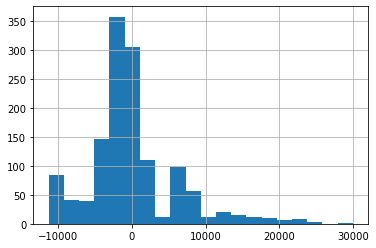

In [18]:
lm3.resid.hist(bins = 20)

Does this look like a normal distribution?  How does it compare to the plot of the residuals in the previous model?

Let's also plot the residuals (y) against the actual charges (x):

Text(0, 0.5, 'Residual')

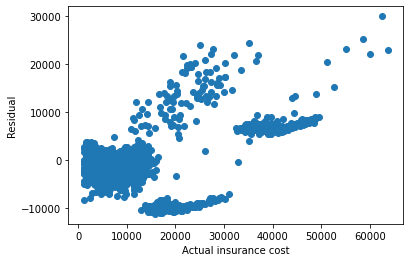

In [19]:
plt.scatter(x = insurance_new2["charges"], y = lm3.resid)
plt.xlabel("Actual insurance cost")
plt.ylabel("Residual")

What do you notice about this plot?

Which linear model would you use to predict insurance policy charges?

### Section 5:  Linear regression with the scikit-learn library

In this final section, we will learn to perform linear regression with the [scikit-learn library](https://scikit-learn.org/stable/).  The scikit-learn library is a widely used machine learning library.  *Machine learning* broadly refers to using computer models and algorithms to make predictions from data.  Linear regression can be considered machine learning, and we will be learning several other machine learning techniques in the following labs.  Being able to run linear regression with the scikit-learn library will make it easier to compare the performance of linear regression to other machine learning methods operating on the same data.

First import the functions we will use from the scikit-learn library (sklearn).

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

To use scikit-learn, we need to split our DataFrame into the independent variables (x) and the dependent variable (y).

First, create a new DataFrame `x` by dropping the `charges` column.  We can do this easily with the `.drop()` function, which has the pattern:
`new_df = df.drop("column_name_to_drop", axis =1)`

Can you figure out the code to drop the `charges` column?

In [22]:
x = insurance_new2.drop("charges", axis = 1)
x.head()

age     bmi  children  smoker_yes  sex_male  region_northwest  \
0   19  27.900         0           1         0                 0   
1   18  33.770         1           0         1                 0   
2   28  33.000         3           0         1                 0   
3   33  22.705         0           0         1                 1   
4   32  28.880         0           0         1                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

<details><summary>Answer:</summary>
<code>
x = insurance_new2.drop("charges", axis = 1)
</code>
</details>

Display your new DataFrame `x` to check it is correct.

Create a new variable `y` equal to the `charges` column in your DataFrame.

In [23]:
y = insurance_new2["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Now that we have create two new variables `x` and `y` with just independent and dependent variable(s), respectively, we can run linear regression on them in scikit-learn. 

First, we create a linear regression model object:

In [24]:
linear_regressor = LinearRegression()

Next, we fit the linear regression model to the data:

In [25]:
linear_regressor.fit(x,y)

LinearRegression()

There is no summary method in scikit-learn, but we can find the predicted charges for each row in our data as follows.

In [26]:
y_pred = linear_regressor.predict(x)
y_pred

array([25293.7130284 ,  3448.60283431,  6706.9884907 , ...,
        4149.13248568,  1246.58493898, 37085.62326757])

This function gives the same values as `lm3.fittedvalues` in the statsmodels library.

In [27]:
lm3.fittedvalues

0       25293.713028
1        3448.602834
2        6706.988491
3        3754.830163
4        5592.493386
            ...     
1333    12351.323686
1334     3511.930809
1335     4149.132486
1336     1246.584939
1337    37085.623268
Length: 1338, dtype: float64

We will mainly compare different machine learning models using the *Mean Squared Error, (MSE)* which for linear regression is the sum of the squares of the residuals divided by the number of residuals.  Remember that the linear regression equation minimizes the sum of the squares of the residuals.

To compute the Mean Squared Error for all our data points:

In [28]:
mean_squared_error(y, y_pred)

36501893.00741544

By itself, the Mean Squared Error does not tell us a lot.  But in the next lab we will compare it with mean squared errors for other prediction methods.